## [통계적머신러닝] 과제4
통계학과 2019150419 기다연<br>
2021.10.07

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import neighbors, datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score 
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# Download iris data
iris = sns.load_dataset('iris')
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [13]:
print(iris.shape)

(150, 5)


In [20]:
X = iris.drop('species', axis=1)
print(X.shape)
y = iris['species']
print(y.shape)

(150, 4)
(150,)


In [19]:
# species label-encoding
classle = LabelEncoder() 
iris['species'] = classle.fit_transform(iris['species'].values)
print('species labels:', np.unique(y))

species labels: [0 1 2]


In [22]:
# Divide to train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [24]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)    # training data의 표준화
X_test_std = sc.transform(X_test)      # test data의 표준화

X_train_std[1:5,]

array([[-0.55053619,  0.76918392, -1.16537974, -1.30728421],
       [ 0.65376173,  0.30368356,  0.84243039,  1.44587881],
       [ 1.0150511 ,  0.53643374,  1.0655204 ,  1.18367281],
       [-1.03225536,  0.30368356, -1.44424226, -1.30728421]])

In [26]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5, p=2)
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

### 문제1.
iris 데이터 또는 다른 데이터를 이용하여 knn에서 weights='distance'로 준 경우와 'uniform'(default)로 준 경우를 비교하라.

In [29]:
iris = datasets.load_iris()
X = iris.data 
y = iris.target

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

In [30]:
# PCA dimension reduction to 2D for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X)

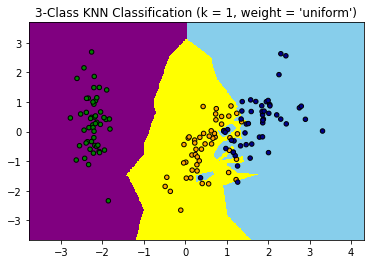

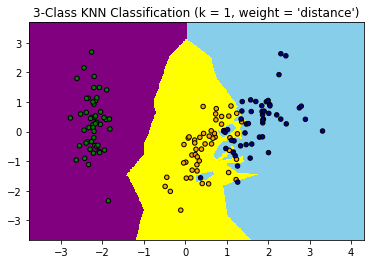

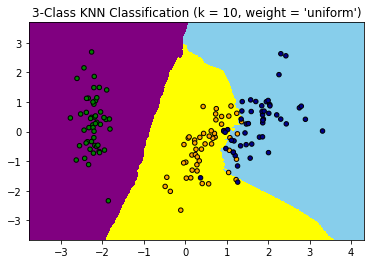

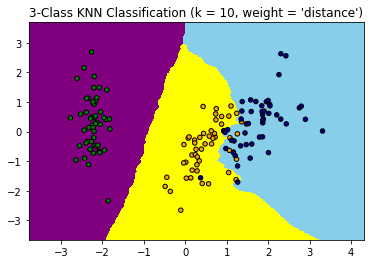

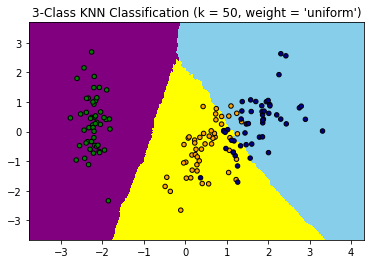

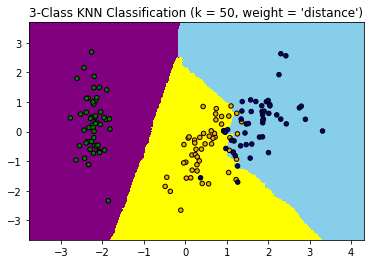

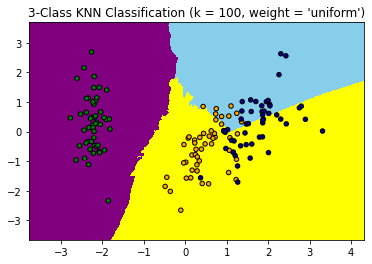

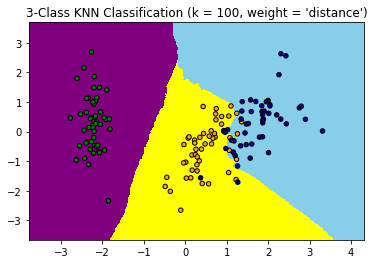

In [35]:
h = .02  # step size in the mesh

cmap_light = ListedColormap(['purple', 'yellow', 'skyblue'])
cmap_bold = ListedColormap(['green', 'orange', 'darkblue'])

# set different weights (uniform, distance)
for k in [1, 10, 50, 100]:
    for weights in ['uniform', 'distance']:
        clf = neighbors.KNeighborsClassifier(algorithm='auto', metric='minkowski',
                         metric_params=None, n_jobs=-1, p=2,
                        n_neighbors = k, weights=weights)
        clf.fit(X, y)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        Z = Z.reshape(xx.shape)
        plt.figure()
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
        
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,edgecolor='k', s=20)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title("3-Class KNN Classification (k = %i, weight = '%s')"
                  % (k, weights))

plt.show()

In [50]:
# Show accuracy metric
for k in [1, 10, 50, 100]:
    for weights in ['uniform', 'distance']:
        clf = neighbors.KNeighborsClassifier(algorithm='auto', metric='minkowski',
                         metric_params=None, n_jobs=-1, p=2,
                        n_neighbors = k, weights=weights)
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        conf = confusion_matrix(y_test, pred)
        print(('Confusion matrix (k = %i, weight = %s): ' % (k, weights)), conf)
        print('Accuracy score (k = %i, weight = %s): ' % (k, weights), str(accuracy_score(y_test,pred)))
        print('F1 score (k = %i, weight = %s): ' % (k, weights), str(f1_score(y_test,pred, average=None)))
        print('-'*100)
    print('='*100)

Confusion matrix (k = 1, weight = uniform):  [[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
Accuracy score (k = 1, weight = uniform):  0.9777777777777777
F1 score (k = 1, weight = uniform):  [1.         0.96774194 0.96551724]
----------------------------------------------------------------------------------------------------
Confusion matrix (k = 1, weight = distance):  [[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
Accuracy score (k = 1, weight = distance):  0.9777777777777777
F1 score (k = 1, weight = distance):  [1.         0.96774194 0.96551724]
----------------------------------------------------------------------------------------------------
Confusion matrix (k = 10, weight = uniform):  [[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
Accuracy score (k = 10, weight = uniform):  0.9777777777777777
F1 score (k = 10, weight = uniform):  [1.         0.96774194 0.96551724]
----------------------------------------------------------------------------------------------------
Confusion matrix (k = 10, weight = distance

### 문제2.
교재의 데이터를 이용하여 bandwidth를 조절하여 그 효과를 논의하고 'gaussian' 이외의 kernel을 적용하여 차이를 비교하라.

In [51]:
iris = sns.load_dataset('iris') 
X = iris.drop('species', axis=1) 
y = iris['species']   

In [52]:
# Kernel density
xx = X['sepal_length'].values # Iris data의 첫번째 feature
xx = xx.T.reshape(-1, 1) # reshape

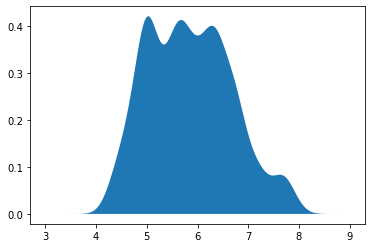

In [53]:
kd = KernelDensity(bandwidth=0.2, kernel='gaussian')
kd.fit(xx)
xx_d = np.linspace(3, 9, 1000)
logprob=kd.score_samples(xx_d.reshape(-1, 1))
plt.fill_between(xx_d, np.exp(logprob))

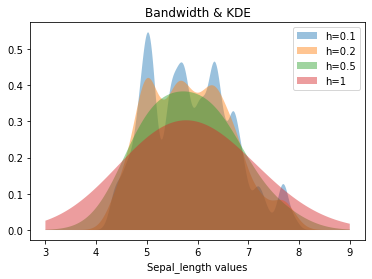

In [57]:
# Change values of bandwidth
for i in [0.1, 0.2, 0.5, 1]:    
    kd=KernelDensity(bandwidth=i, kernel='gaussian')
    kd.fit(xx)
    xx_d = np.linspace(3, 9, 1000)
    logprob=kd.score_samples(xx_d.reshape(-1, 1)) 
    plt.fill_between(xx_d, np.exp(logprob), alpha=0.45) 
    plt.xlabel('Sepal_length values')
    plt.legend(['h=0.1', 'h=0.2', 'h=0.5', 'h=1'])
    plt.title('Bandwidth & KDE')
plt.show()

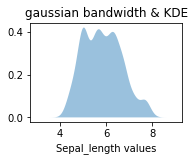

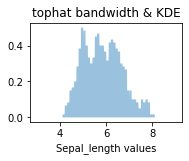

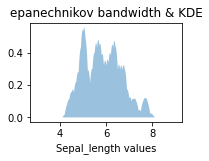

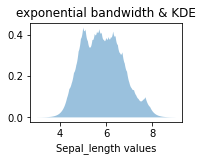

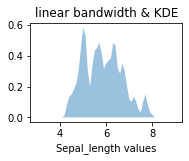

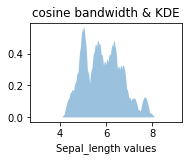

In [79]:
# Change values of kernel function (set bandwidth=0.2)
plt.subplot(2,2,1)
kd=KernelDensity(bandwidth=0.2, kernel='gaussian')
kd.fit(xx)
xx_d = np.linspace(3, 9, 1000)
logprob=kd.score_samples(xx_d.reshape(-1, 1)) 
plt.fill_between(xx_d, np.exp(logprob), alpha=0.45) 
plt.xlabel('Sepal_length values')
plt.title('gaussian' + ' ' + 'bandwidth & KDE')
plt.show()

plt.subplot(2,2,2)
kd=KernelDensity(bandwidth=0.2, kernel='tophat')
kd.fit(xx)
xx_d = np.linspace(3, 9, 1000)
logprob=kd.score_samples(xx_d.reshape(-1, 1)) 
plt.fill_between(xx_d, np.exp(logprob), alpha=0.45) 
plt.xlabel('Sepal_length values')
plt.title('tophat' + ' ' + 'bandwidth & KDE')
plt.show()

plt.subplot(2,2,3)
kd=KernelDensity(bandwidth=0.2, kernel='epanechnikov')
kd.fit(xx)
xx_d = np.linspace(3, 9, 1000)
logprob=kd.score_samples(xx_d.reshape(-1, 1)) 
plt.fill_between(xx_d, np.exp(logprob), alpha=0.45) 
plt.xlabel('Sepal_length values')
plt.title('epanechnikov' + ' ' + 'bandwidth & KDE')
plt.show()

plt.subplot(2,2,4)
kd=KernelDensity(bandwidth=0.2, kernel='exponential')
kd.fit(xx)
xx_d = np.linspace(3, 9, 1000)
logprob=kd.score_samples(xx_d.reshape(-1, 1)) 
plt.fill_between(xx_d, np.exp(logprob), alpha=0.45) 
plt.xlabel('Sepal_length values')
plt.title('exponential' + ' ' + 'bandwidth & KDE')
plt.show()

plt.subplot(2,2,1)
kd=KernelDensity(bandwidth=0.2, kernel='linear')
kd.fit(xx)
xx_d = np.linspace(3, 9, 1000)
logprob=kd.score_samples(xx_d.reshape(-1, 1)) 
plt.fill_between(xx_d, np.exp(logprob), alpha=0.45) 
plt.xlabel('Sepal_length values')
plt.title('linear' + ' ' + 'bandwidth & KDE')
plt.show()

plt.subplot(2,2,2)
kd=KernelDensity(bandwidth=0.2, kernel='cosine')
kd.fit(xx)
xx_d = np.linspace(3, 9, 1000)
logprob=kd.score_samples(xx_d.reshape(-1, 1)) 
plt.fill_between(xx_d, np.exp(logprob), alpha=0.45) 
plt.xlabel('Sepal_length values')
plt.title('cosine' + ' ' + 'bandwidth & KDE')
plt.show()

In [ ]:
# Change values of kernel function (set bandwidth=0.2)
fig, axs = plt.subplots(2, 2)
kd=KernelDensity(bandwidth=0.2, kernel='gaussian')
for j in ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']:
    kd=KernelDensity(bandwidth=0.2, kernel=j)
    kd.fit(xx)
    xx_d = np.linspace(3, 9, 1000)
    logprob=kd.score_samples(xx_d.reshape(-1, 1)) 
    plt.fill_between(xx_d, np.exp(logprob), alpha=0.45) 
    plt.xlabel('Sepal_length values')
    plt.title(str(j) + ' ' + 'bandwidth & KDE')
    print(kd.score(xx_d.reshape(-1, 1)))
plt.show()
print('-'*100)

-12177.093379629921
-4889.118105860423
-2606.3077977845965
-2068.456614524518


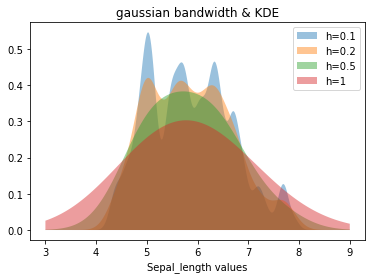

----------------------------------------------------------------------------------------------------
-inf
-inf
-inf
-inf


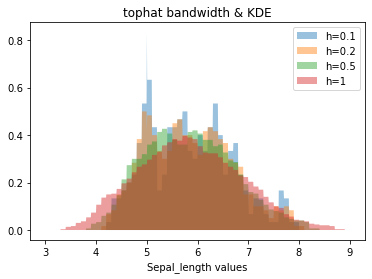

----------------------------------------------------------------------------------------------------
-inf
-inf
-inf
-inf


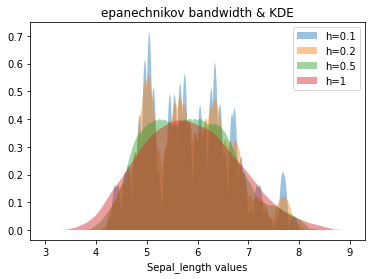

----------------------------------------------------------------------------------------------------
-4387.07886363484
-3153.2116751997683
-2315.1462231837213
-2056.026228143091


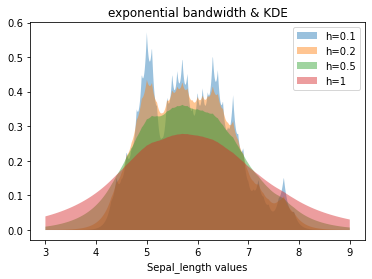

----------------------------------------------------------------------------------------------------
-inf
-inf
-inf
-inf


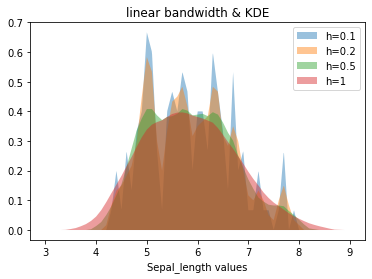

----------------------------------------------------------------------------------------------------
-inf
-inf
-inf
-inf


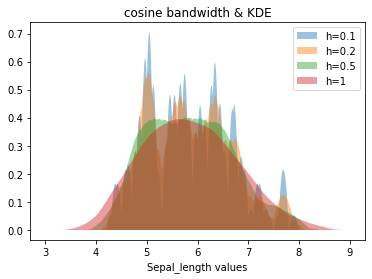

----------------------------------------------------------------------------------------------------


In [60]:
# Change values of bandwidth and kernel function
for j in ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']:
    for i in [0.1, 0.2, 0.5, 1]:    
        kd=KernelDensity(bandwidth=i, kernel=j)
        kd.fit(xx)
        xx_d = np.linspace(3, 9, 1000)
        logprob=kd.score_samples(xx_d.reshape(-1, 1)) 
        plt.fill_between(xx_d, np.exp(logprob), alpha=0.45) 
        plt.xlabel('Sepal_length values')
        plt.legend(['h=0.1', 'h=0.2', 'h=0.5', 'h=1'])
        plt.title(str(j) + ' ' + 'bandwidth & KDE')
        print(kd.score(xx_d.reshape(-1, 1)))
    plt.show()
    print('-'*100)